# How to Handle Missing Data
https://machinelearningmastery.com/handle-missing-data-python/

In [20]:
# load and summarize the dataset
from pandas import read_csv
# load the dataset
dataframe = read_csv( '../../Datasets/horse-colic.csv' , header=None, na_values= '?')
# summarize the dataset
print(dataframe.head())

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


In [21]:
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum()
    perc = n_miss / dataframe.shape[0] * 100
    print( ' > %d, Missing: %d (%.1f%%) ' % (i, n_miss, perc))

 > 0, Missing: 1 (0.3%) 
 > 1, Missing: 0 (0.0%) 
 > 2, Missing: 0 (0.0%) 
 > 3, Missing: 60 (20.0%) 
 > 4, Missing: 24 (8.0%) 
 > 5, Missing: 58 (19.3%) 
 > 6, Missing: 56 (18.7%) 
 > 7, Missing: 69 (23.0%) 
 > 8, Missing: 47 (15.7%) 
 > 9, Missing: 32 (10.7%) 
 > 10, Missing: 55 (18.3%) 
 > 11, Missing: 44 (14.7%) 
 > 12, Missing: 56 (18.7%) 
 > 13, Missing: 104 (34.7%) 
 > 14, Missing: 106 (35.3%) 
 > 15, Missing: 247 (82.3%) 
 > 16, Missing: 102 (34.0%) 
 > 17, Missing: 118 (39.3%) 
 > 18, Missing: 29 (9.7%) 
 > 19, Missing: 33 (11.0%) 
 > 20, Missing: 165 (55.0%) 
 > 21, Missing: 198 (66.0%) 
 > 22, Missing: 1 (0.3%) 
 > 23, Missing: 0 (0.0%) 
 > 24, Missing: 0 (0.0%) 
 > 25, Missing: 0 (0.0%) 
 > 26, Missing: 0 (0.0%) 
 > 27, Missing: 0 (0.0%) 


## Statistical Imputation
https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/

Statistical Imputation With `SimpleImputer`

The scikit-learn machine learning library provides the SimpleImputer class that supports
statistical imputation. In this section, we will explore how to effectively use the SimpleImputer
class.

In [37]:
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

In [23]:
from sklearn.impute import SimpleImputer
from numpy import isnan
strategies = [ 'mean' , 'median' , 'most_frequent' , 'constant' ]
for s in strategies:
    # define imputer
    imputer = SimpleImputer(strategy=s )
    # fit on the dataset
    imputer.fit(X)
    # transform the dataset
    Xtrans = imputer.transform(X)
    # summarize total missing
    print( ' Missing: %d ' % sum(isnan(Xtrans).flatten()))

 Missing: 0 
 Missing: 0 
 Missing: 0 
 Missing: 0 


 >mean 0.864 (0.053) 
 >median 0.867 (0.057) 
 >most_frequent 0.870 (0.048) 
 >constant 0.879 (0.045) 


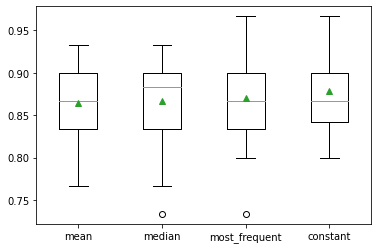

In [27]:
from numpy import std, mean
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# evaluate each strategy on the dataset
results = list()
strategies = [ 'mean' , 'median' , 'most_frequent' , 'constant' ]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[( 'i' , SimpleImputer(strategy=s)), ( 'm' ,
    RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring= 'accuracy' , cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print( ' >%s %.3f (%.3f) ' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

## KNN Imputation
https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

 >1 0.853 (0.057) 
 >3 0.857 (0.050) 
 >5 0.857 (0.059) 
 >7 0.866 (0.054) 
 >9 0.863 (0.053) 
 >15 0.867 (0.056) 
 >18 0.861 (0.058) 
 >21 0.860 (0.053) 


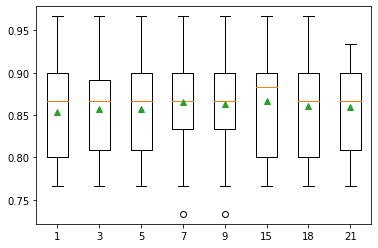

In [35]:
from sklearn.impute import KNNImputer
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[( 'i' , KNNImputer(n_neighbors=int(s))), ( 'm' ,
    RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring= 'accuracy' , cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print( ' >%s %.3f (%.3f) ' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

## Iterative Imputation
https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/

In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# evaluate each strategy on the dataset
results = list()
strategies = [ 'ascending' , 'descending' , 'roman' , 'arabic' , 'random' ]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[( ' i ' , IterativeImputer(imputation_order=s)), ( ' m ' ,
    RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring= 'accuracy' , cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print( ' >%s %.3f (%.3f) ' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot
pyplot.show()

 >ascending 0.873 (0.049) 
 >descending 0.870 (0.050) 
 >roman 0.877 (0.056) 
 >arabic 0.873 (0.050) 
 >random 0.867 (0.048) 
